<a href="https://colab.research.google.com/github/engelsm/mless_fork/blob/main/homework2/7_multi_model_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Check for causality

😈 **Task 3:** Run a Granger test between `temp` and `o3`. Is there any directional causality?

😈 **Question 3:** Why is Granger causality not the same as actual causality?


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
for col in ["no2", "temp", "no", "press"]:
    print(f"\nTesting if {col} Granger-causes o3:")
    grangercausalitytests(dataframe[['o3', col]], maxlag=4)

# Task 1 of HW2

In [1]:
from google.colab import files
uploaded = files.upload()

Saving LSTM_multistep_forecast_DENW094.csv to LSTM_multistep_forecast_DENW094.csv
Saving LSTM_rollingonestep_forecast_DENW094.csv to LSTM_rollingonestep_forecast_DENW094.csv
Saving mlp_forecast_DENW094.csv to mlp_forecast_DENW094.csv
Saving PatchTST_forecast_DENW094.csv to PatchTST_forecast_DENW094.csv
Saving sarima_forecast_DENW094.csv to sarima_forecast_DENW094.csv
Saving X_test_sample_DENW094.csv to X_test_sample_DENW094.csv
Saving y_test_sample_DENW094.csv to y_test_sample_DENW094.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import io  # Needed for uploaded file handling

  # Load CSV files using io.BytesIO to read the byte content
sarima_df = pd.read_csv(io.BytesIO(uploaded["sarima_forecast_DENW094.csv"]))
mlp_df = pd.read_csv(io.BytesIO(uploaded["mlp_forecast_DENW094.csv"]))
lstm_multistep_df = pd.read_csv(io.BytesIO(uploaded["LSTM_multistep_forecast_DENW094.csv"]))
lstm_rollingonestep_df = pd.read_csv(io.BytesIO(uploaded["LSTM_rollingonestep_forecast_DENW094.csv"]))
patchtst_df = pd.read_csv(io.BytesIO(uploaded["PatchTST_forecast_DENW094.csv"]))
x_test_sample_df = pd.read_csv(io.BytesIO(uploaded["X_test_sample_DENW094.csv"]))
y_test_sample_df = pd.read_csv(io.BytesIO(uploaded["y_test_sample_DENW094.csv"]))

# Extract forecast arrays
forecasts = {
    "MLP": mlp_df["forecast_values"].values,
    "LSTM_multistep": lstm_multistep_df["forecast_values"].values,
    "LSTM_rollingonestep": lstm_rollingonestep_df["forecast_values"].values,
    "SARIMA": sarima_df["forecast_values"].values,
    "PatchTST": patchtst_df["forecast_values"].values,
}

# Extract X_test_sample and y_test_sample arrays
X_test_sample = x_test_sample_df.values.flatten()   # Flatten to 1D array
y_test_sample = y_test_sample_df.values.flatten()

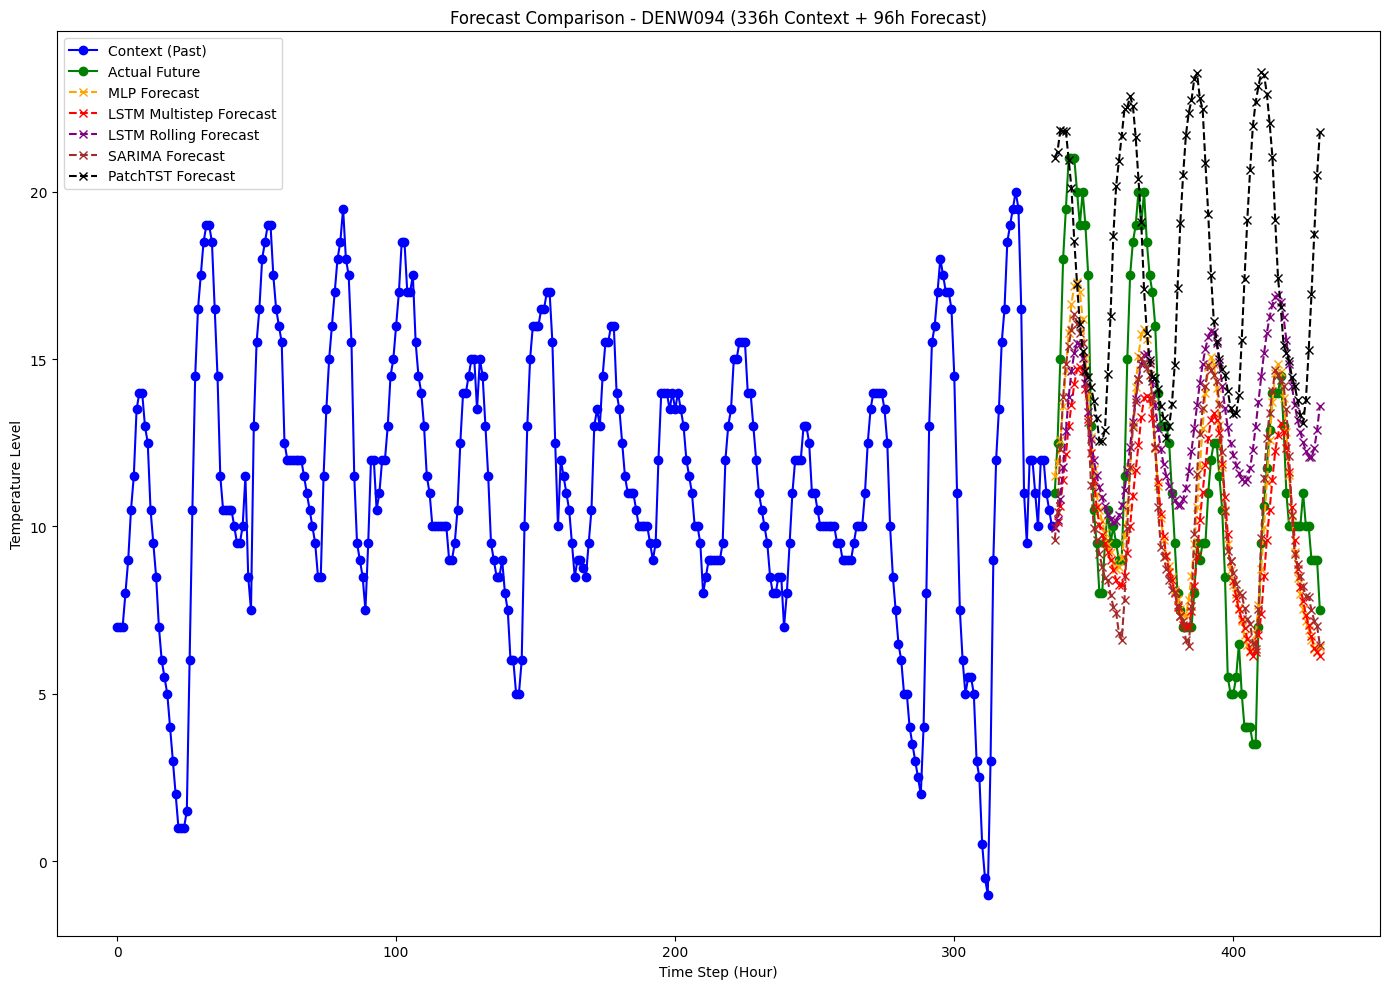

In [5]:
context_window = 336
prediction_horizon = 96

plt.figure(figsize=(14, 10))

# Plot the context (past 336h)
plt.plot(range(context_window), X_test_sample, label="Context (Past)", color="blue", marker="o")

# Plot the actual future (true values)
plt.plot(range(context_window, context_window + prediction_horizon), y_test_sample, label="Actual Future", color="green", marker="o")

# Plot all model forecasts
plt.plot(range(context_window, context_window + prediction_horizon), forecasts["MLP"], label="MLP Forecast", linestyle="--", color="orange", marker="x")
plt.plot(range(context_window, context_window + prediction_horizon), forecasts["LSTM_multistep"], label="LSTM Multistep Forecast", linestyle="--", color="red", marker="x")
plt.plot(range(context_window, context_window + prediction_horizon), forecasts["LSTM_rollingonestep"], label="LSTM Rolling Forecast", linestyle="--", color="purple", marker="x")
plt.plot(range(context_window, context_window + prediction_horizon), forecasts["SARIMA"], label="SARIMA Forecast", linestyle="--", color="brown", marker="x")
plt.plot(range(context_window, context_window + prediction_horizon), forecasts["PatchTST"], label="PatchTST Forecast", linestyle="--", color="black", marker="x")

# Plot details
plt.title("Forecast Comparison - DENW094 (336h Context + 96h Forecast)")
plt.xlabel("Time Step (Hour)")
plt.ylabel("Temperature Level")
plt.legend()
plt.tight_layout()
plt.show()

